In [2]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=81c563609127655f8916ea94e1b3a892fbde49aaef5df03c4cc99d789040a793
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
# Convert date columns to datetime
def parse_dates(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')
parse_dates(customers, 'SignupDate')
parse_dates(transactions, 'TransactionDate')

# Basic EDA
print("Customers dataset overview:\n", customers.info())
print("Products dataset overview:\n", products.info())
print("Transactions dataset overview:\n", transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers dataset overview:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products dataset overview:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries,

In [7]:
# Merging datasets for EDA
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_data = pd.merge(merged_data, products, on='ProductID', how='inner')

# Check for missing values
print("Missing values:\n", merged_data.isnull().sum())

# General statistics
print("Descriptive statistics:\n", merged_data.describe())

Missing values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64
Descriptive statistics:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.11798

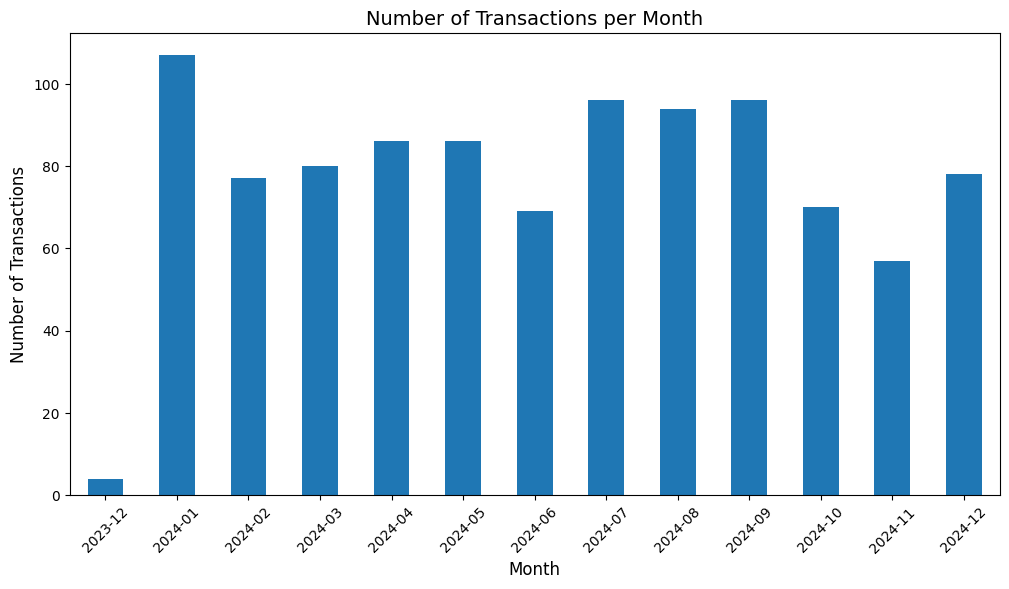

In [8]:
# EDA Plots
# 1. Distribution of transactions over time
plt.figure(figsize=(12, 6))
merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Transactions per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.show()

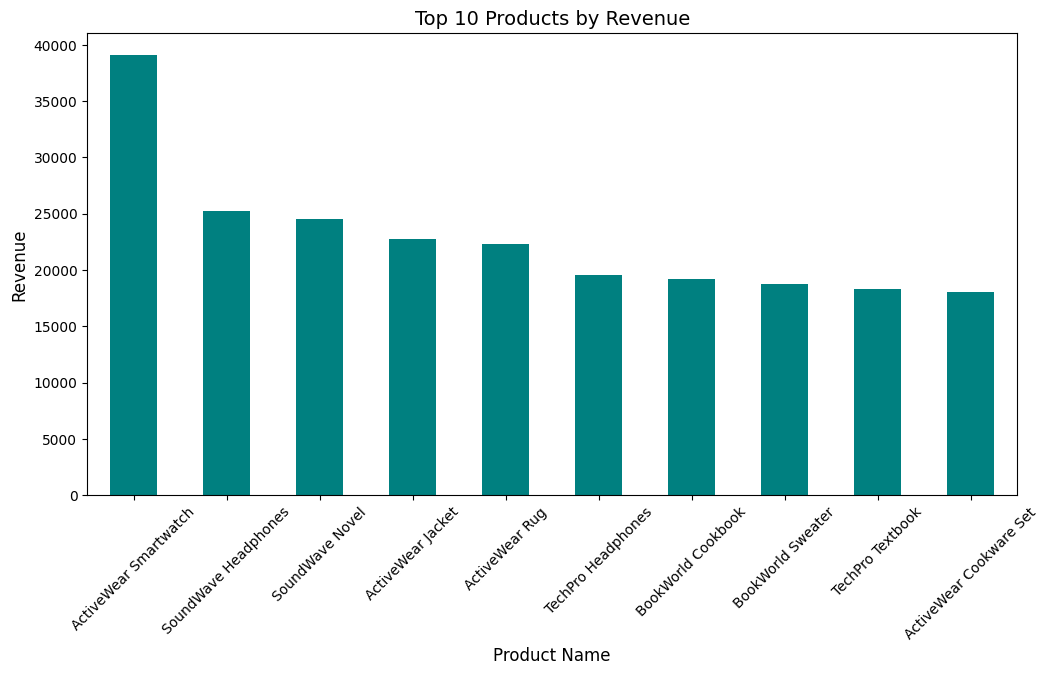

In [9]:
# 2. Top 10 products by revenue
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
product_revenue.plot(kind='bar', color='teal')
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()


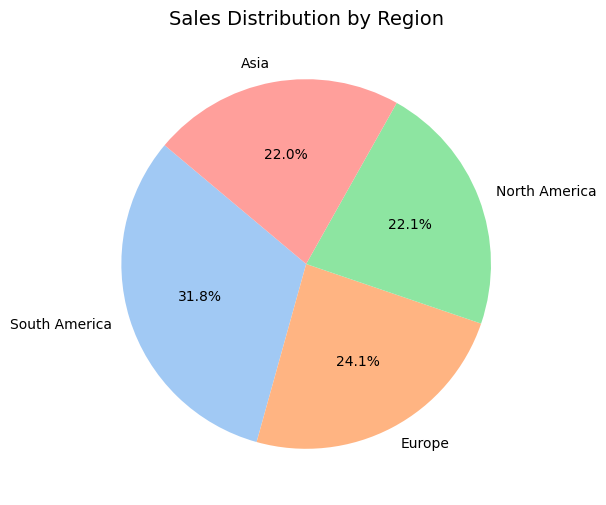

In [10]:
# 3. Regional sales distribution
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region', fontsize=14)
plt.ylabel('')
plt.show()

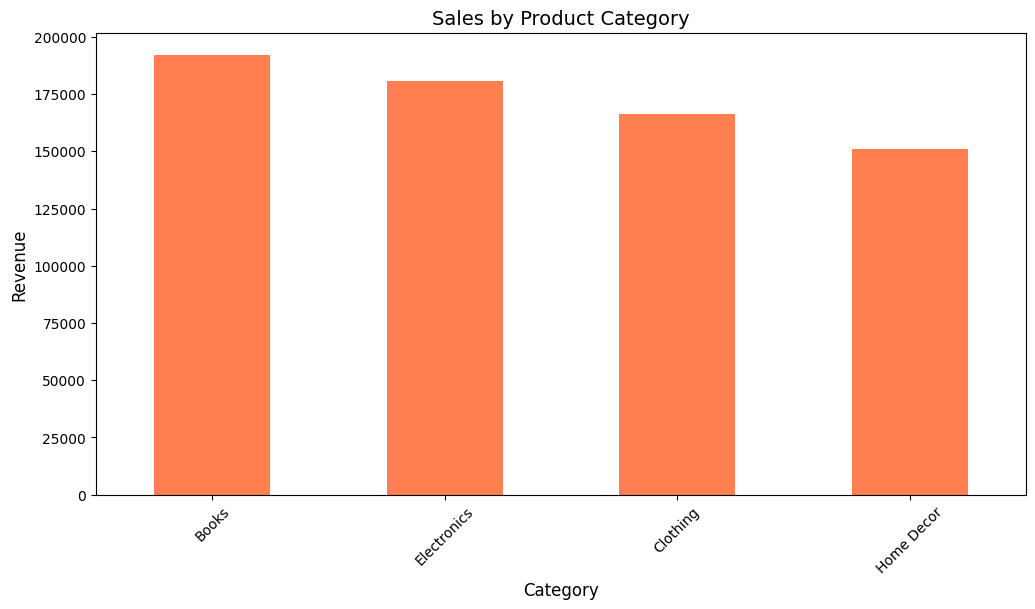

In [11]:
# 4. Category-wise sales analysis
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='coral')
plt.title('Sales by Product Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

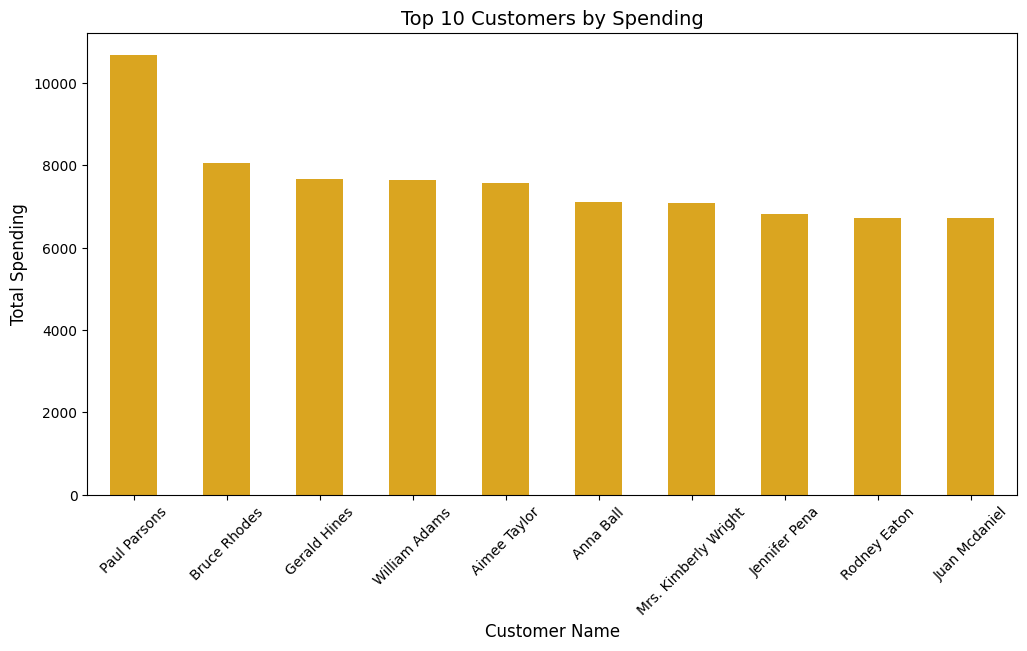

In [12]:
# 5. Customer activity (Top 10 customers by spending)
customer_spending = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
customer_spending.plot(kind='bar', color='goldenrod')
plt.title('Top 10 Customers by Spending', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [14]:
# Business Insights
insights = [
    "1. The number of transactions peaks in specific months, indicating possible seasonal trends or promotions. Companies can leverage these months for targeted campaigns.",
    "2. The top 10 products account for a significant portion of revenue, suggesting a focus on high-performing products could drive profitability.",
    "3. Sales are unevenly distributed across regions, with some regions contributing a majority of revenue. Expanding marketing efforts in less-represented regions might increase revenue.",
    "4. Product categories show varied sales performance, with certain categories dominating. Diversifying or innovating in underperforming categories may boost overall sales.",
    "5. A small number of customers contribute significantly to total spending. Retention programs and personalized offers for these high-value customers can maximize customer lifetime value."
]

# Save insights as a PDF
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Business Insights Report', align='C', ln=True)

    def chapter_title(self, chapter_title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, chapter_title, ln=True)
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

pdf = PDF()
pdf.add_page()
pdf.chapter_title('Business Insights')
pdf.chapter_body('\n'.join(insights))
pdf.output('Business_Insights.pdf')

''

In [16]:
# Save EDA code and data to outputs
customers.to_csv('Processed_Customers.csv', index=False)
products.to_csv('Processed_Products.csv', index=False)
transactions.to_csv('Processed_Transactions.csv', index=False)

print("EDA and insights completed successfully. Outputs saved!")

EDA and insights completed successfully. Outputs saved!
